<a href="https://colab.research.google.com/github/anu-105/demo/blob/main/Internal_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LKPBL**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 61.1 MB/s eta 0:00:00


In [ ]:
!pip install PyPDF2 spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm

2023-12-03 19:52:50.715706: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 19:52:50.715758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 19:52:50.715796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 19:52:50.723404: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 19:52:51.822937: W tensorflow/c

In [ ]:
!pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.7 MB/s eta 0:00:00


In [ ]:
import os
import PyPDF2
import spacy
import fitz

nlp = spacy.load('en_core_web_sm')

# Folder Path
path = "/content/gdrive/MyDrive/sam3"

# Change the directory
os.chdir(path)

def preprocess(text):
    doc = nlp(text)
    result = [token.lemma_ for token in doc if token.is_alpha and len(token) > 3]
    return result

doc_corpus = []

import fitz  # PyMuPDF

def read_pdf(file_path):
    text = ''
    with fitz.open(file_path) as pdf_doc:
        for page_number in range(pdf_doc.page_count):
            page = pdf_doc[page_number]
            text += page.get_text()
    return text


# Iterate over all the files in the directory
for file in os.listdir():
    if file.endswith('.pdf'):
        # Create the filepath of a particular file
        file_path = os.path.join(path, file)
        # print(file_path)
        file_text_data = read_pdf(file_path)
        # print(len(file_text_data))
        file_data = preprocess(file_text_data)
        # print(len(file_data))
        doc_corpus.append(file_data)

print(doc_corpus[:])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(doc_corpus[:1])

[['HDFC', 'Bank', 'Consolidated', 'Quarterly', 'Results', 'Banks', 'Private', 'Sector', 'Consolidated', 'Quarterly', 'result', 'HDFC', 'Bank', 'this', 'datum', 'easily', 'copy', 'paste', 'into', 'Microsoft', 'Excel', 'sheet', 'PRINT', 'HDFC', 'Bank', 'Previous', 'Years', 'Consolidated', 'Quarterly', 'result', 'interest', 'earn', 'Bills', 'income', 'Investment', 'balance', 'with', 'other', 'other', 'Income', 'expenditure', 'interest', 'expend', 'employee', 'Cost', 'other', 'expense', 'Depreciation', 'operate', 'Profit', 'before', 'Provisions', 'contingency', 'Provisions', 'contingency', 'Exceptional', 'Items', 'before', 'after', 'from', 'ordinary', 'activity', 'Prior', 'Year', 'adjustment', 'Extra', 'Ordinary', 'Items', 'Period', 'Minority', 'Interest', 'share', 'Associates', 'after', 'Associates', 'Equity', 'Share', 'Capital', 'Reserves', 'exclude', 'revaluation', 'reserve', 'Equity', 'Dividend', 'Rate', 'ANALYTICAL', 'RATIOS', 'share', 'Govt', 'Capital', 'Adequacy', 'Ratio', 'Basel', 

In [ ]:
# bigram = gensim.models.Phrases(doc_corpus, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[doc_corpus], threshold=100)

# # Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# # See trigram example
# print(trigram_mod[bigram_mod[doc_corpus[0]]])

import gensim

# Assuming you have 'doc_corpus' defined somewhere before this code snippet

bigram = gensim.models.Phrases(doc_corpus, min_count=5, threshold=100) # higher threshold, fewer phrases.
trigram = gensim.models.Phrases(bigram[doc_corpus], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[doc_corpus[0]]])

['HDFC', 'Bank', 'Consolidated', 'Quarterly_Results', 'Banks_Private', 'Sector', 'Consolidated', 'Quarterly', 'result', 'HDFC', 'Bank', 'this', 'datum_easily', 'copy_paste_into_Microsoft', 'Excel_sheet', 'PRINT', 'HDFC', 'Bank', 'Previous_Years', 'Consolidated', 'Quarterly', 'result', 'interest', 'earn', 'Bills', 'income', 'Investment', 'balance', 'with', 'other', 'other', 'Income', 'expenditure', 'interest', 'expend', 'employee', 'Cost', 'other', 'expense', 'Depreciation', 'operate', 'Profit_before', 'Provisions_contingency', 'Provisions_contingency', 'Exceptional_Items_before', 'after', 'from', 'ordinary', 'activity', 'Prior_Year_adjustment_Extra', 'Ordinary_Items_Period', 'Minority', 'Interest', 'share', 'Associates', 'after', 'Associates', 'Equity_Share_Capital', 'Reserves_exclude_revaluation_reserve', 'Equity_Dividend_Rate', 'ANALYTICAL', 'RATIOS', 'share', 'Govt', 'Capital_Adequacy_Ratio_Basel', 'Capital_Adequacy_Ratio_Basel', 'before_Extra_Ordinary', 'Basic_Diluted', 'after_Extr

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization

def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

# Tokenize and lemmatize

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stop words dataset
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['case', 'appeal', 'prosecution', '.', ',',"financial", "march", "cost", "year", "shall", "provide", "include", "end", "entitled", "mclr",
                   "agree", "without", "require", "also", "document", "information", "right", "furnished", "hearby",
                   "change", "within", "applicable", "make", "refer", "extra", "exceptional", "hold", "fair"])


# Define your remove_stopwords function
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Now you can use remove_stopwords function without encountering the NameError
doc_corpus_nostops = remove_stopwords(doc_corpus)
print(doc_corpus_nostops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Remove Stop Words
doc_corpus_nostops = remove_stopwords(doc_corpus)
print((doc_corpus_nostops))

# Form Bigrams
doc_corpus_bigrams = make_bigrams(doc_corpus_nostops)
print(len(doc_corpus_bigrams))

# Form trigrams
doc_corpus_trigrams = make_trigrams(doc_corpus_nostops)
print(len(doc_corpus_bigrams))

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv

#print(data_lemmatized[:1])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



49
49


In [ ]:
import gensim
from gensim import corpora

#Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
dictionary = corpora.Dictionary(doc_corpus_trigrams)
#dictionary.filter_extremes(no_below=50, no_above=0.5)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_corpus_trigrams]
print(doc_term_matrix[:])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 5), (8, 2), (9, 2), (10, 2), (11, 1), (12, 3), (13, 2), (14, 5), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 5), (35, 2), (36, 2), (37, 3), (38, 1), (39, 2), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 4), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 2), (57, 1), (58, 2), (59, 1), (60, 5), (61, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 3), (67, 2), (68, 1), (69, 2), (70, 11), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 2), (78, 1)], [(0, 1), (2, 1), (5, 2), (10, 2), (12, 1), (13, 2), (14, 5), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (29, 1), (30, 3), (31, 1), (35, 2), (36, 4), (37, 2), (39, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (47, 4), (48, 1), 

In [ ]:
from gensim.models import LsiModel, TfidfModel
from gensim.models.coherencemodel import CoherenceModel

x = range(5, 35, 5)
for n in x:
  lsamodel = LsiModel(doc_term_matrix, num_topics=n, id2word = dictionary)  # train model
  coherencemodel = CoherenceModel(model=lsamodel, texts=doc_corpus_trigrams, dictionary=dictionary, coherence='c_v')
  coherence_lsi = coherencemodel.get_coherence()
  print('\nCoherence Score:  for ', coherence_lsi)


Coherence Score:  for  0.5551892406072507

Coherence Score:  for  0.4794442808022339

Coherence Score:  for  0.4533011273908786

Coherence Score:  for  0.394190350493664

Coherence Score:  for  0.3740884878574937

Coherence Score:  for  0.3852176623235647


In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
#x = range(5, 150, 5)
#for n in x:
lda_model = gensim.models.ldamodel.LdaModel(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=100,
                                           alpha='symmetric',
                                            eta='symmetric',
                                           per_word_topics=True)
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_corpus_trigrams, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Running and Trainign LDA model on the document term matrix.
#ldamodel = Lda(doc_term_matrix, num_topics=50, id2word = dictionary, passes=50)


Perplexity:  -7.578823997758593

Coherence Score:  0.486251431126694


In [ ]:
#print(ldamodel.print_topics(num_topics=20))
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[doc_term_matrix]

[(16,
  '0.052*"share" + 0.026*"quarterly" + 0.023*"ordinary" + 0.022*"standalone" + '
  '0.015*"income" + 0.015*"result" + 0.015*"items" + 0.013*"bank" + '
  '0.013*"crores" + 0.013*"total"'),
 (26,
  '0.000*"contract" + 0.000*"agreement" + 0.000*"company" + 0.000*"service" + '
  '0.000*"product" + 0.000*"term" + 0.000*"party" + 0.000*"time" + '
  '0.000*"period" + 0.000*"court"'),
 (3,
  '0.018*"secretary" + 0.014*"court" + 0.009*"congress" + 0.008*"state" + '
  '0.008*"loan" + 0.007*"power" + 0.007*"mohela" + 0.006*"authority" + '
  '0.006*"borrower" + 0.006*"statute"'),
 (5,
  '0.020*"court" + 0.018*"petitioner" + 0.015*"order" + 0.011*"state" + '
  '0.009*"date" + 0.007*"writ_petition" + 0.007*"section" + 0.006*"respondent" '
  '+ 0.006*"service" + 0.005*"high"'),
 (17,
  '0.025*"court" + 0.011*"amount" + 0.011*"section" + 0.010*"employee" + '
  '0.009*"scheme" + 0.009*"word" + 0.007*"date" + 0.007*"application" + '
  '0.007*"high" + 0.007*"pension"'),
 (1,
  '0.000*"borrower" + 0

In [ ]:
count=0
for i in lda_model[doc_term_matrix]:
  print("pdf  :", count, i)
  count=count+1

pdf  : 0 ([(16, 0.99304545)], [(0, [16]), (1, [16]), (2, [16]), (3, [16]), (4, [16]), (5, [16]), (6, [16]), (7, [16]), (8, [16]), (9, [16]), (10, [16]), (11, [16]), (12, [16]), (13, [16]), (14, [16]), (15, [16]), (16, [16]), (17, [16]), (18, [16]), (19, [16]), (20, [16]), (21, [16]), (22, [16]), (23, [16]), (24, [16]), (25, [16]), (26, [16]), (27, [16]), (28, [16]), (29, [16]), (30, [16]), (31, [16]), (32, [16]), (33, [16]), (34, [16]), (35, [16]), (36, [16]), (37, [16]), (38, [16]), (39, [16]), (40, [16]), (41, [16]), (42, [16]), (43, [16]), (44, [16]), (45, [16]), (46, [16]), (47, [16]), (48, [16]), (49, [16]), (50, [16]), (51, [16]), (52, [16]), (53, [16]), (54, [16]), (55, [16]), (56, [16]), (57, [16]), (58, [16]), (59, [16]), (60, [16]), (61, [16]), (62, [16]), (63, [16]), (64, [16]), (65, [16]), (66, [16]), (67, [16]), (68, [16]), (69, [16]), (70, [16]), (71, [16]), (72, [16]), (73, [16]), (74, [16]), (75, [16]), (76, [16]), (77, [16]), (78, [16])], [(0, [(16, 0.99997175)]), (1, 

In [ ]:
# Assuming you have already defined and trained your LDA model as lda_model

num_topics = 30  # Change this to the actual number of topics in your model

# List to store topic-wise words
topic_words_lists = []

# Iterate through topics
for topic in range(num_topics):
    # Get topics and frequencies and store in a dictionary structure
    topic_words_freq = dict(lda_model.show_topic(topic, topn=50))

    # Extract words for the current topic
    topic_words = list(topic_words_freq.keys())

    # Save words to a list with a dynamic name (Words_Topic1, Words_Topic2, etc.)
    list_name = f"Words_Topic{topic + 1}"
    locals()[list_name] = topic_words

    # Append words to the overall list
    topic_words_lists.append(topic_words)

# Print or use the lists as needed
for i, topic_words in enumerate(topic_words_lists):
    list_name = f"Words_Topic{i + 1}"
    print(f"{list_name}: {topic_words}")


Words_Topic1: ['borrower', 'agreement', 'company', 'amount', 'contract', 'bank', 'court', 'time', 'service', 'agency', 'interest', 'date', 'business', 'value', 'term', 'loan', 'party', 'statement', 'provision', 'section', 'account', 'authority', 'asset', 'liability', 'security', 'share', 'give', 'sale', 'report', 'rule', 'lender', 'obligation', 'payment', 'state', 'schedule', 'rate', 'work', 'period', 'product', 'relate', 'part', 'event', 'income', 'increase', 'purpose', 'condition', 'performance', 'charge', 'facility', 'risk']
Words_Topic2: ['borrower', 'bank', 'date', 'company', 'agreement', 'amount', 'loan', 'account', 'court', 'statement', 'asset', 'interest', 'section', 'term', 'time', 'value', 'liability', 'result', 'service', 'investment', 'order', 'state', 'contract', 'sale', 'increase', 'business', 'would', 'lender', 'report', 'rate', 'share', 'schedule', 'follow', 'payment', 'security', 'obligation', 'party', 'period', 'relate', 'basis', 'employee', 'high', 'million', 'facili

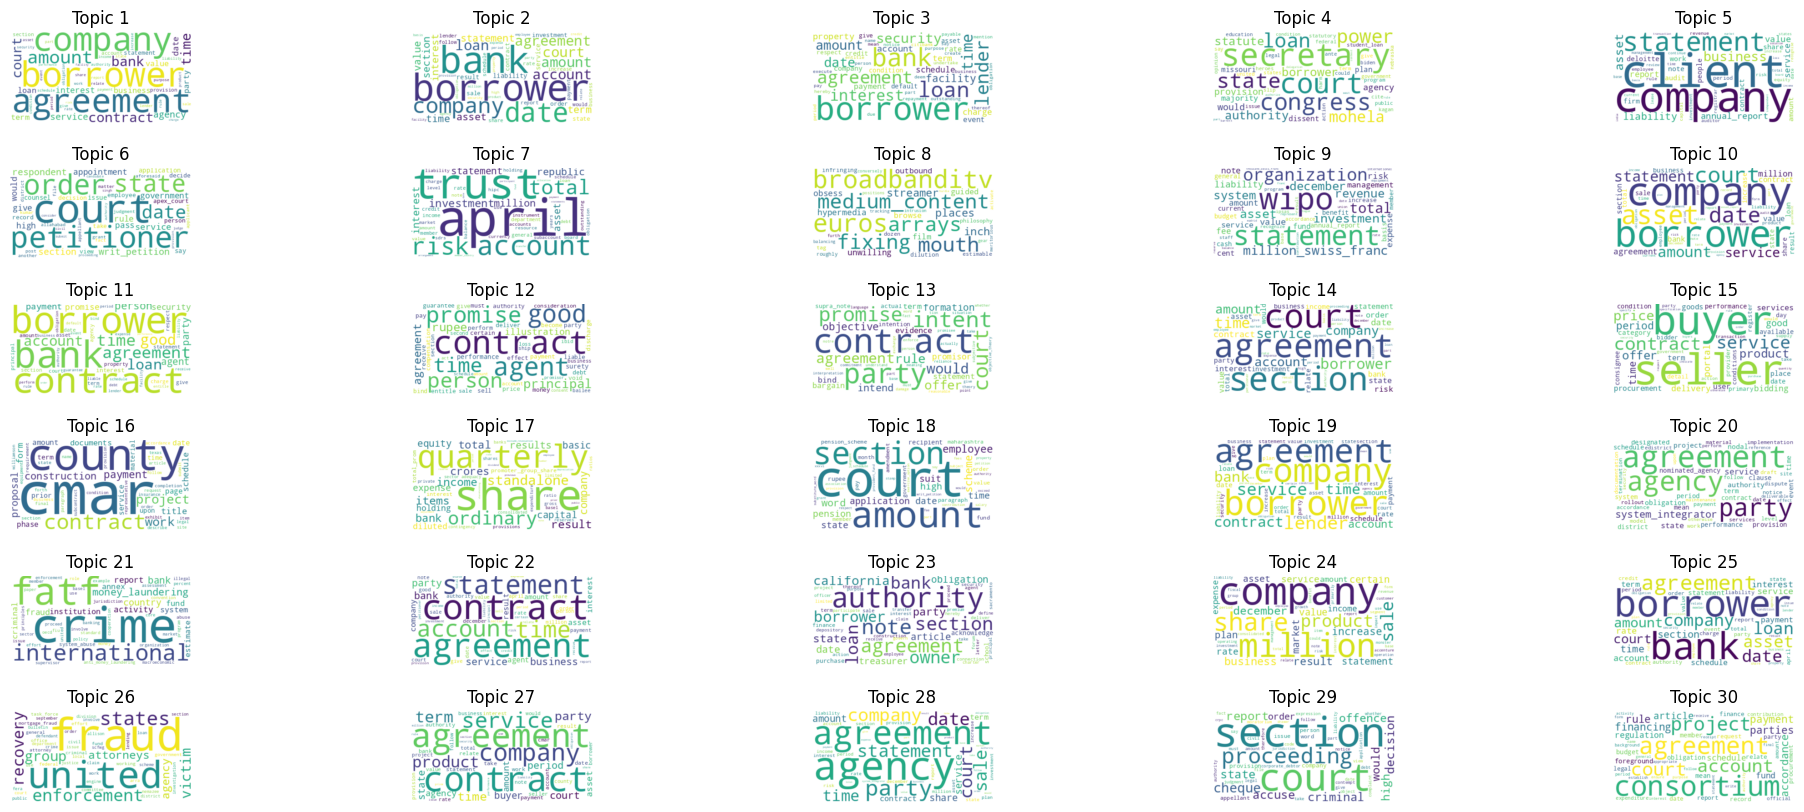

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already defined and trained your LDA model as lda_model

num_topics = 30  # Change this to the actual number of topics in your model

# Set up subplots
num_rows = 6  # Increase the number of rows
num_cols = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 10), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5)

for topic in range(num_topics):
    # Get topics and frequencies and store in a dictionary structure
    topic_words_freq = dict(lda_model.show_topic(topic, topn=50))

    # Generate Word Cloud for topic using frequencies
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(topic_words_freq)

    # Plot each word cloud in a subplot
    ax = axes[topic // num_cols, topic % num_cols]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {topic + 1}')
    ax.axis("off")

plt.show()

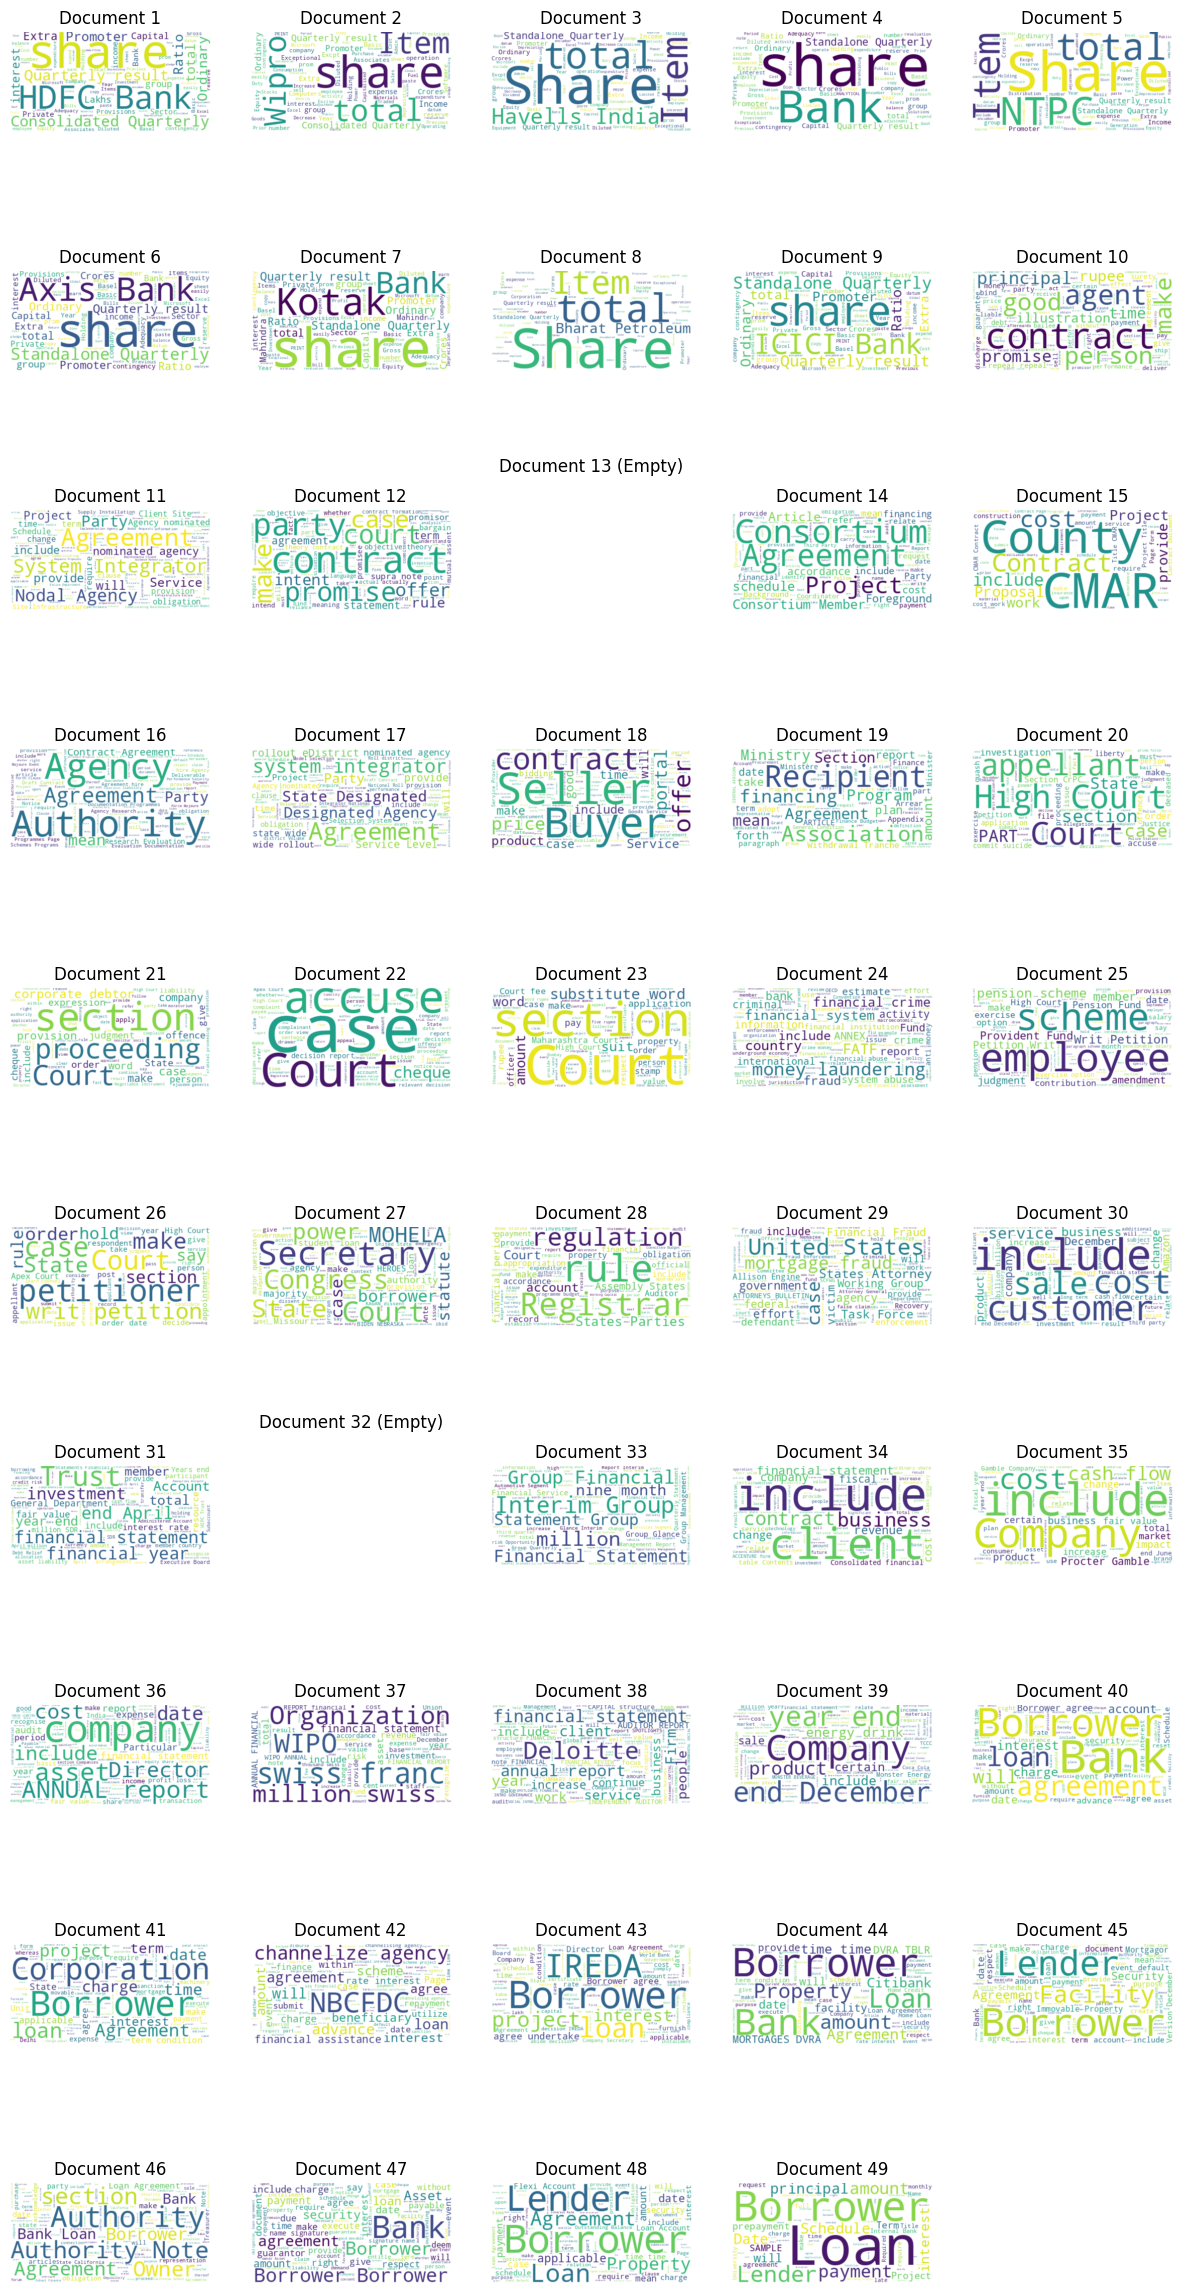

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set up subplots
num_files = len(doc_corpus)
rows = num_files // 5 + 1
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(15, 3 * rows), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5)

for i, document_words in enumerate(doc_corpus):
    # Join the list of words into a single string
    document_text = ' '.join(document_words)

    # Check if the document has words
    if document_text:
        # Generate Word Cloud for document using frequencies
        wordcloud = WordCloud(background_color="white").generate(document_text)

        # Plot each word cloud in a subplot
        ax = axes[i // 5, i % 5]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Document {i + 1}')
        ax.axis("off")
    else:
        # Handle empty documents (optional)
        ax = axes[i // 5, i % 5]
        ax.set_title(f'Document {i + 1} (Empty)')
        ax.axis("off")

# Remove empty subplots if there are fewer documents than the total number of subplots
for i in range(num_files, rows * 5):
    fig.delaxes(axes.flatten()[i])

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


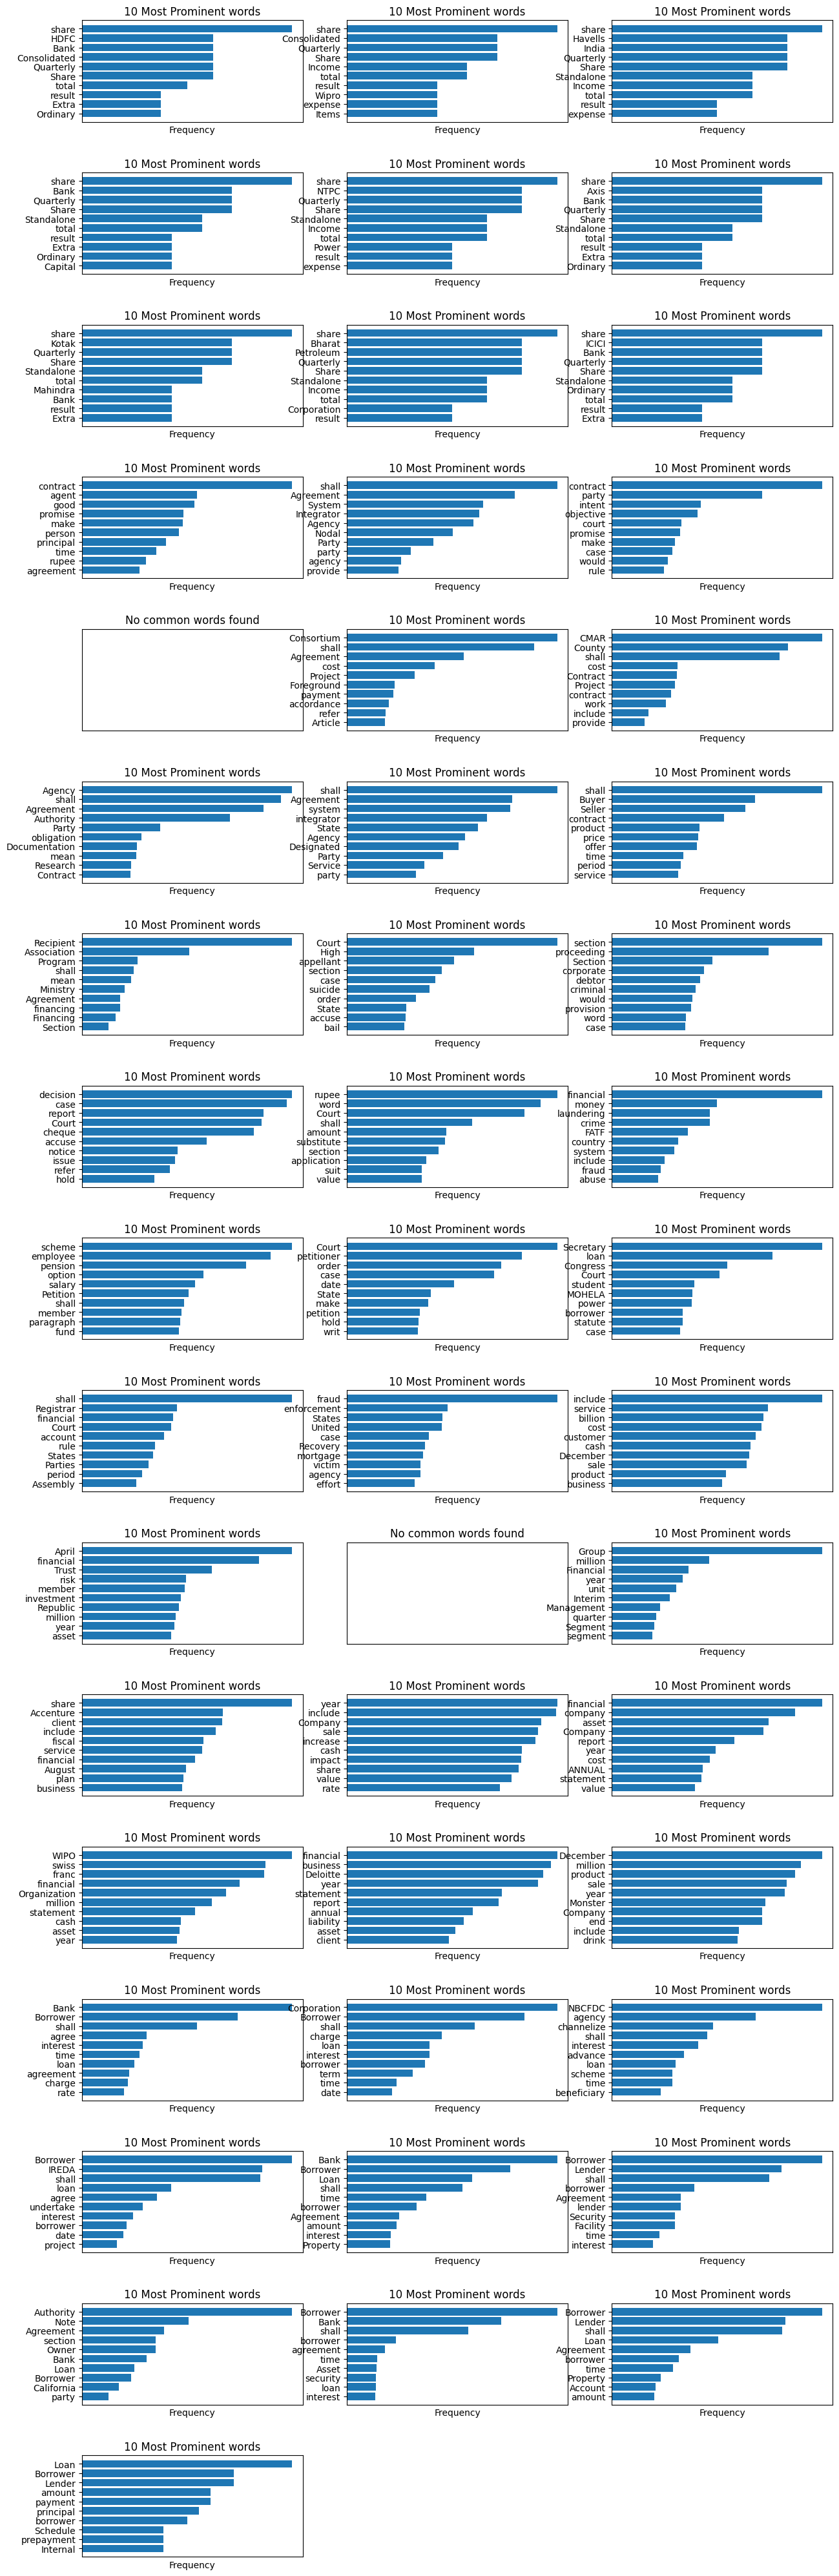

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

# Assuming you have already defined and processed your doc_corpus

# Download the stop words dataset
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

# Set up subplots
num_files = len(doc_corpus)
rows = num_files // 3 + 1  # Adjusted to display 3 charts in one line
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 3 * rows), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.5)

# Function to create and display bar chart for most occurring words
def plot_most_occurring_words(document_words, ax):
    # Remove stopwords
    document_words = remove_stopwords(document_words)

    # Get the most common words in the document
    common_words = Counter(document_words).most_common(10)

    # Check if common_words has values before unpacking
    if common_words:
        # Extract words and frequencies for plotting
        words, frequencies = zip(*common_words)

        # Plot horizontal bar chart
        ax.barh(words[::-1], frequencies[::-1])  # Reverse the order
        ax.set_title("10 Most Prominent words")
        ax.set_yticks(range(len(words)))  # Set the ticks
        ax.set_yticklabels(words[::-1], rotation=0, ha='right')  # Reverse the order
        ax.set_xlabel("Frequency")
    else:
        ax.set_title("No common words found")

# Loop through each document and plot the bar chart
for i, document_words in enumerate(doc_corpus):
    # Plot each bar chart in a subplot
    ax = axes[i // 3, i % 3]
    plot_most_occurring_words(document_words, ax)

# Remove empty subplots if there are fewer documents than the total number of subplots
for i in range(num_files, rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
from collections import Counter
from nltk.corpus import stopwords

# Assuming you have already defined and processed your doc_corpus

# Download the stop words dataset
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a list of words
def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

# Function to get the most common words in a document
def get_most_occurring_words(document_words):
    # Remove stopwords
    document_words = remove_stopwords(document_words)

    # Get the most common words in the document
    common_words = Counter(document_words).most_common(10)

    # Extract words for storage
    words = [word[0] for word in common_words]

    return words

# Loop through each document and save the most occurring words as variables
for i, document_words in enumerate(doc_corpus):
    list_name = f"List_Doc{i + 1}"
    most_occurring_words = get_most_occurring_words(document_words)
    locals()[list_name] = most_occurring_words

# Print or use the lists as needed
for i in range(len(doc_corpus)):
    list_name = f"List_Doc{i + 1}"
    print(f"{list_name}: {locals()[list_name]}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


List_Doc1: ['share', 'HDFC', 'Bank', 'Consolidated', 'Quarterly', 'Share', 'total', 'result', 'Extra', 'Ordinary']
List_Doc2: ['share', 'Consolidated', 'Quarterly', 'Share', 'Income', 'total', 'result', 'Wipro', 'expense', 'Items']
List_Doc3: ['share', 'Havells', 'India', 'Quarterly', 'Share', 'Standalone', 'Income', 'total', 'result', 'expense']
List_Doc4: ['share', 'Bank', 'Quarterly', 'Share', 'Standalone', 'total', 'result', 'Extra', 'Ordinary', 'Capital']
List_Doc5: ['share', 'NTPC', 'Quarterly', 'Share', 'Standalone', 'Income', 'total', 'Power', 'result', 'expense']
List_Doc6: ['share', 'Axis', 'Bank', 'Quarterly', 'Share', 'Standalone', 'total', 'result', 'Extra', 'Ordinary']
List_Doc7: ['share', 'Kotak', 'Quarterly', 'Share', 'Standalone', 'total', 'Mahindra', 'Bank', 'result', 'Extra']
List_Doc8: ['share', 'Bharat', 'Petroleum', 'Quarterly', 'Share', 'Standalone', 'Income', 'total', 'Corporation', 'result']
List_Doc9: ['share', 'ICICI', 'Bank', 'Quarterly', 'Share', 'Standalon

In [ ]:
print(List_Doc45)

['Borrower', 'Lender', 'shall', 'borrower', 'Agreement', 'lender', 'Security', 'Facility', 'time', 'interest']


In [ ]:
# Assuming you have List_Doc40 to List_Doc49 already defined

# Merge List_Doc40 to List_Doc49 into LoanAgreement with distinct words
LoanAgreement = []

# Loop through List_Doc40 to List_Doc49 and append distinct words to LoanAgreement
for i in range(40, 50):
    list_name = f"List_Doc{i}"
    if list_name in locals():
        LoanAgreement.extend(locals()[list_name])

# Remove duplicates by converting to a set and then back to a list
LoanAgreement = list(set(LoanAgreement))

# Print or use LoanAgreement as needed
print("LoanAgreement:", LoanAgreement)

LoanAgreement: ['NBCFDC', 'Owner', 'Facility', 'California', 'Borrower', 'beneficiary', 'party', 'rate', 'IREDA', 'scheme', 'security', 'term', 'lender', 'Lender', 'time', 'agency', 'loan', 'Bank', 'advance', 'interest', 'Loan', 'Security', 'Property', 'agreement', 'borrower', 'amount', 'Account', 'payment', 'charge', 'Authority', 'Note', 'Internal', 'prepayment', 'Corporation', 'Schedule', 'principal', 'section', 'shall', 'Asset', 'agree', 'project', 'undertake', 'date', 'channelize', 'Agreement']


In [ ]:
# Assuming you have List_Doc40 to List_Doc49 already defined

# Merge List_Doc40 to List_Doc49 into BalanceSheet with distinct words
BalanceSheet = []

# Loop through List_Doc40 to List_Doc49 and append distinct words to BalanceSheet
for i in range(1,10):
    list_name = f"List_Doc{i}"
    if list_name in locals():
        BalanceSheet.extend(locals()[list_name])

# Remove duplicates by converting to a set and then back to a list
BalanceSheet = list(set(BalanceSheet))

# Print or use BalanceSheet as needed
print("BalanceSheet:", BalanceSheet)

BalanceSheet: ['Axis', 'Extra', 'Ordinary', 'total', 'HDFC', 'result', 'Wipro', 'Items', 'Income', 'NTPC', 'expense', 'Capital', 'Quarterly', 'Bank', 'Mahindra', 'Petroleum', 'ICICI', 'Share', 'Kotak', 'Corporation', 'Power', 'India', 'Consolidated', 'Standalone', 'share', 'Havells', 'Bharat']


In [ ]:
# Assuming you have List_Doc40 to List_Doc49 already defined

# Merge List_Doc40 to List_Doc49 into CourtCase with distinct words
CourtCase = []

# Loop through List_Doc40 to List_Doc49 and append distinct words to CourtCase
for i in range(20,30):
    list_name = f"List_Doc{i}"
    if list_name in locals():
        CourtCase.extend(locals()[list_name])

# Remove duplicates by converting to a set and then back to a list
CourtCase = list(set(CourtCase))

# Print or use CourtCase as needed
print("CourtCase:", CourtCase)

CourtCase: ['financial', 'petition', 'issue', 'rupee', 'paragraph', 'word', 'borrower', 'accuse', 'section', 'Assembly', 'statute', 'effort', 'application', 'debtor', 'employee', 'writ', 'period', 'proceeding', 'corporate', 'include', 'scheme', 'petitioner', 'laundering', 'system', 'Section', 'Secretary', 'amount', 'cheque', 'Congress', 'Registrar', 'FATF', 'report', 'fraud', 'power', 'option', 'hold', 'would', 'appellant', 'victim', 'make', 'account', 'refer', 'mortgage', 'country', 'case', 'agency', 'money', 'suit', 'United', 'suicide', 'member', 'pension', 'substitute', 'provision', 'enforcement', 'notice', 'date', 'Parties', 'abuse', 'value', 'Court', 'student', 'criminal', 'State', 'Petition', 'loan', 'High', 'crime', 'fund', 'Recovery', 'decision', 'shall', 'MOHELA', 'States', 'bail', 'order', 'salary', 'rule']


In [ ]:
# Assuming you have List_Doc40 to List_Doc49 already defined

# Merge List_Doc40 to List_Doc49 into ContractAgreement with distinct words
ContractAgreement = []

# Loop through List_Doc40 to List_Doc49 and append distinct words to ContractAgreement
for i in range(10,20):
    list_name = f"List_Doc{i}"
    if list_name in locals():
        ContractAgreement.extend(locals()[list_name])

# Remove duplicates by converting to a set and then back to a list
ContractAgreement = list(set(ContractAgreement))

# Print or use ContractAgreement as needed
print("ContractAgreement:", ContractAgreement)

ContractAgreement: ['contract', 'make', 'System', 'period', 'obligation', 'Nodal', 'price', 'person', 'mean', 'party', 'refer', 'service', 'Program', 'objective', 'work', 'Documentation', 'Ministry', 'Consortium', 'accordance', 'include', 'case', 'offer', 'time', 'agency', 'Research', 'system', 'Integrator', 'integrator', 'State', 'Party', 'Financing', 'rupee', 'promise', 'County', 'Section', 'good', 'court', 'product', 'Project', 'CMAR', 'agreement', 'payment', 'Authority', 'financing', 'Agency', 'rule', 'principal', 'provide', 'Foreground', 'shall', 'Contract', 'Service', 'agent', 'Recipient', 'intent', 'Buyer', 'Association', 'cost', 'Seller', 'Article', 'would', 'Designated', 'Agreement']


In [ ]:
# Assuming you have List_Doc40 to List_Doc49 already defined

# Merge List_Doc40 to List_Doc49 into FinancialReport with distinct words
FinancialReport = []

# Loop through List_Doc40 to List_Doc49 and append distinct words to FinancialReport
for i in range(30,40):
    list_name = f"List_Doc{i}"
    if list_name in locals():
        FinancialReport.extend(locals()[list_name])

# Remove duplicates by converting to a set and then back to a list
FinancialReport = list(set(FinancialReport))

# Print or use FinancialReport as needed
print("FinancialReport:", FinancialReport)

FinancialReport: ['financial', 'unit', 'increase', 'ANNUAL', 'end', 'Organization', 'service', 'rate', 'cash', 'Monster', 'segment', 'Segment', 'fiscal', 'franc', 'include', 'WIPO', 'value', 'company', 'August', 'drink', 'customer', 'sale', 'annual', 'December', 'investment', 'asset', 'Company', 'April', 'business', 'Republic', 'million', 'product', 'impact', 'Deloitte', 'Group', 'quarter', 'year', 'member', 'plan', 'Accenture', 'report', 'billion', 'client', 'Financial', 'statement', 'cost', 'risk', 'Interim', 'share', 'swiss', 'liability', 'Trust', 'Management']


In [ ]:
# Print or use the renamed lists as needed
print("BalanceSheet:", BalanceSheet)
print("ContractAgreement:", ContractAgreement)
print("CourtCaseFiles:", CourtCase)
print("FinancialReport:", FinancialReport)
print("LoanAgreement:", LoanAgreement)

BalanceSheet: ['Axis', 'Extra', 'Ordinary', 'total', 'HDFC', 'result', 'Wipro', 'Items', 'Income', 'NTPC', 'expense', 'Capital', 'Quarterly', 'Bank', 'Mahindra', 'Petroleum', 'ICICI', 'Share', 'Kotak', 'Corporation', 'Power', 'India', 'Consolidated', 'Standalone', 'share', 'Havells', 'Bharat']
ContractAgreement: ['contract', 'make', 'System', 'period', 'obligation', 'Nodal', 'price', 'person', 'mean', 'party', 'refer', 'service', 'Program', 'objective', 'work', 'Documentation', 'Ministry', 'Consortium', 'accordance', 'include', 'case', 'offer', 'time', 'agency', 'Research', 'system', 'Integrator', 'integrator', 'State', 'Party', 'Financing', 'rupee', 'promise', 'County', 'Section', 'good', 'court', 'product', 'Project', 'CMAR', 'agreement', 'payment', 'Authority', 'financing', 'Agency', 'rule', 'principal', 'provide', 'Foreground', 'shall', 'Contract', 'Service', 'agent', 'Recipient', 'intent', 'Buyer', 'Association', 'cost', 'Seller', 'Article', 'would', 'Designated', 'Agreement']
Cou

In [ ]:
BalanceSheet_Final= ['total', 'India','share', 'Bank', 'Income', 'Consolidated', 'result', 'Extra', 'Standalone', 'Bharat', 'Share', 'Items', 'Quarterly', 'Corporation', 'expense', 'Ordinary', 'Capital']
ContractAgreement_Final= ['rule', 'County', 'person', 'Designated', 'agent', 'Foreground', 'work', 'Section', 'Article', 'integrator', 'time', 'period', 'Buyer', 'case', 'Ministry', 'principal', 'objective', 'Project', 'CMAR', 'System', 'Consortium', 'payment', 'system', 'shall', 'include', 'Documentation', 'Seller', 'Nodal', 'offer', 'financing', 'provide', 'accordance', 'intent', 'service', 'Financing', 'Recipient', 'agreement', 'promise', 'Party', 'contract', 'court', 'Contract', 'product', 'rupee', 'Association', 'Research', 'price', 'Program', 'Authority', 'refer', 'party', 'obligation', 'make', 'mean', 'Service', 'would', 'good', 'Integrator', 'State', 'cost', 'Agency', 'agency', 'Agreement']
CourtCaseFiles_Final= ['report', 'statute', 'criminal', 'United', 'period', 'option', 'system', 'FATF', 'borrower', 'Congress', 'country', 'section', 'appellant', 'value', 'employee', 'pension', 'order', 'cheque', 'corporate', 'suicide', 'States', 'loan', 'crime', 'student', 'provision', 'effort', 'bail', 'fund', 'petitioner', 'fraud', 'application', 'enforcement', 'laundering', 'scheme', 'make', 'State',  'Parties', 'agency', 'issue', 'rule', 'victim', 'Assembly', 'paragraph', 'petition', 'money', 'proceeding', 'financial', 'case', 'salary', 'Court', 'shall', 'account', 'amount', 'substitute', 'refer', 'would', 'High', 'writ', 'date', 'notice', 'debtor', 'Section', 'decision', 'abuse', 'member', 'Registrar', 'word', 'include', 'Secretary', 'accuse', 'Recovery', 'rupee', 'power', 'mortgage', 'suit', 'hold', 'Petition']
FinancialReport_Final= ['customer', 'company', 'cash', 'segment', 'report', 'Republic', 'investment', 'drink', 'Group', 'share', 'Organization', 'year', 'asset', 'ANNUAL', 'financial', 'business', 'end', 'December', 'member', 'Financial', 'billion', 'August', 'client', 'include', 'increase', 'Segment', 'Management', 'service', 'Trust',  'Company', 'swiss',  'sale', 'product', 'Interim', 'fiscal', 'April', 'million', 'plan', 'impact', 'rate', 'annual', 'statement', 'value', 'quarter',  'franc', 'cost', 'risk', 'unit', 'liability']
LoanAgreement_Final= ['California', 'Account', 'Loan', 'loan', 'charge', 'Borrower', 'time', 'Note', 'Bank', 'term', 'NBCFDC', 'principal', 'Security', 'beneficiary', 'security', 'Facility', 'payment', 'Internal', 'Asset', 'shall', 'Property', 'prepayment', 'IREDA', 'amount', 'Owner', 'borrower', 'Lender', 'agreement', 'Corporation', 'advance', 'lender', 'Authority', 'party', 'interest', 'undertake', 'rate', 'scheme', 'agree', 'section', 'project', 'Schedule', 'channelize', 'agency', 'Agreement', 'date']

In [ ]:
# Assuming you have already defined Words_Topic1 to Words_Topic30, and the specified final lists

# Lists containing final words
final_lists = [
    (BalanceSheet_Final, "BalanceSheet_Final"),
    (ContractAgreement_Final, "ContractAgreement_Final"),
    (CourtCaseFiles_Final, "CourtCaseFiles_Final"),
    (FinancialReport_Final, "FinancialReport_Final"),
    (LoanAgreement_Final, "LoanAgreement_Final")
]

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

# Iterate through Words_Topic lists and calculate similarity with each final list
for i, topic_words in enumerate(topic_words_lists):
    list_name = f"Words_Topic{i + 1}"

    # Display the topic name
    print(f"\nTopic {i + 1} ({list_name}):")

    # Calculate and display similarity with each final list
    for final_list, final_list_name in final_lists:
        similarity = calculate_jaccard_similarity(topic_words, final_list)
        print(f"Similarity with {final_list_name}: {similarity:.2%}")



Topic 1 (Words_Topic1):
Similarity with BalanceSheet_Final: 1.52%
Similarity with ContractAgreement_Final: 13.00%
Similarity with CourtCaseFiles_Final: 10.43%
Similarity with FinancialReport_Final: 16.47%
Similarity with LoanAgreement_Final: 20.25%

Topic 2 (Words_Topic2):
Similarity with BalanceSheet_Final: 4.69%
Similarity with ContractAgreement_Final: 11.88%
Similarity with CourtCaseFiles_Final: 12.39%
Similarity with FinancialReport_Final: 17.86%
Similarity with LoanAgreement_Final: 18.75%

Topic 3 (Words_Topic3):
Similarity with BalanceSheet_Final: 0.00%
Similarity with ContractAgreement_Final: 6.60%
Similarity with CourtCaseFiles_Final: 5.83%
Similarity with FinancialReport_Final: 4.21%
Similarity with LoanAgreement_Final: 17.28%

Topic 4 (Words_Topic4):
Similarity with BalanceSheet_Final: 0.00%
Similarity with ContractAgreement_Final: 3.67%
Similarity with CourtCaseFiles_Final: 7.63%
Similarity with FinancialReport_Final: 1.02%
Similarity with LoanAgreement_Final: 4.40%

Topic 

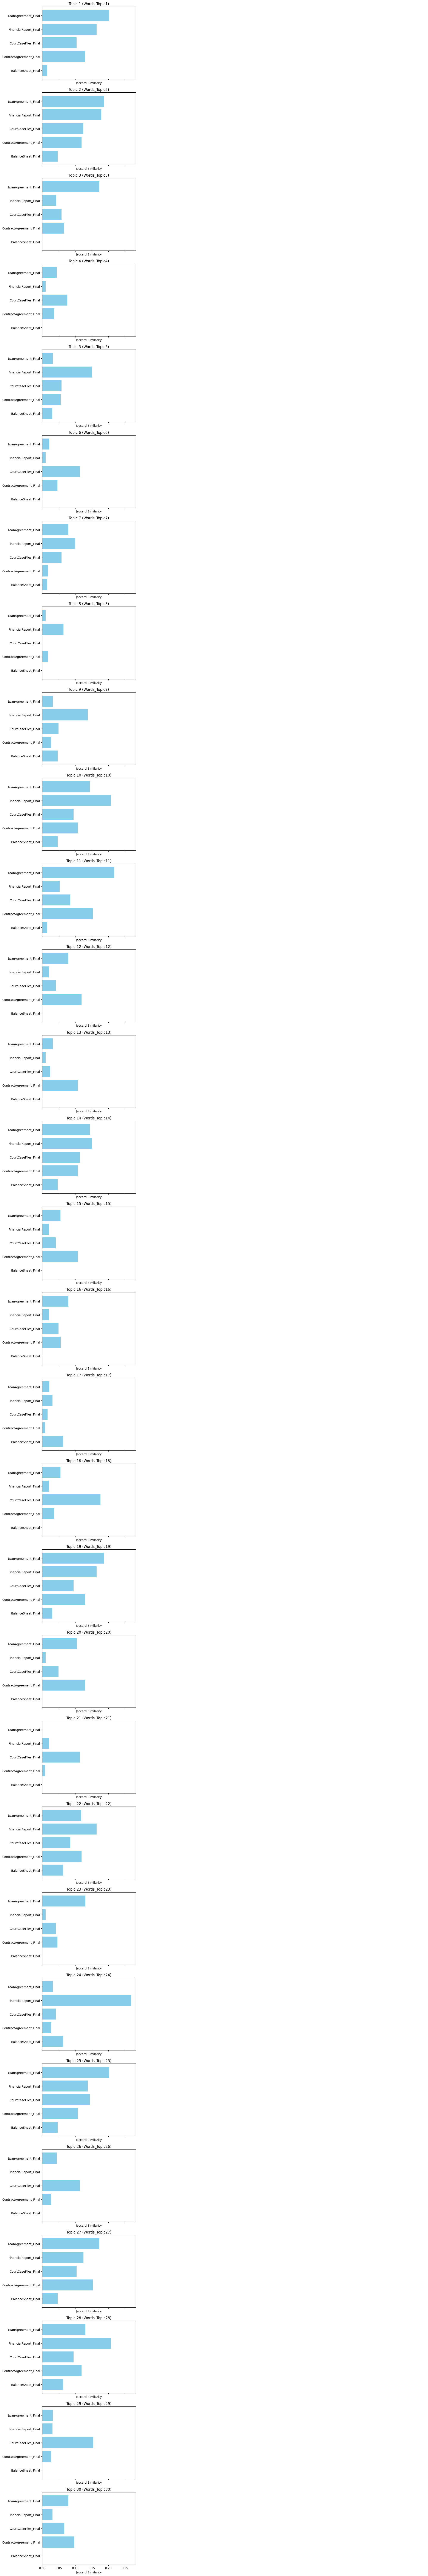

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined Words_Topic1 to Words_Topic30, and the specified final lists

# Lists containing final words
final_lists = [
    (BalanceSheet_Final, "BalanceSheet_Final"),
    (ContractAgreement_Final, "ContractAgreement_Final"),
    (CourtCaseFiles_Final, "CourtCaseFiles_Final"),
    (FinancialReport_Final, "FinancialReport_Final"),
    (LoanAgreement_Final, "LoanAgreement_Final")
]

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

# Set up subplots for four charts in one line
num_topics = len(topic_words_lists)
num_cols = 4
fig, axes = plt.subplots(nrows=num_topics, ncols=num_cols, figsize=(20, 4 * num_topics), sharex=True, sharey=True)

# Iterate through Words_Topic lists and create similarity charts
for i, (topic_words, ax_row) in enumerate(zip(topic_words_lists, axes)):
    list_name = f"Words_Topic{i + 1}"

    # Calculate similarity with each final list
    similarities = [calculate_jaccard_similarity(topic_words, final_list) for final_list, _ in final_lists]

    # Create horizontal bar charts for visualization
    ax_row[0].barh([name for _, name in final_lists], similarities, color='skyblue')
    ax_row[0].set_title(f"Topic {i + 1} ({list_name})")
    ax_row[0].set_xlabel("Jaccard Similarity")

    # Remove the other subplots
    for j in range(1, num_cols):
        ax_row[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Lists containing final words
final_lists = [
    (BalanceSheet_Final, "BalanceSheet_Final"),
    (ContractAgreement_Final, "ContractAgreement_Final"),
    (CourtCaseFiles_Final, "CourtCaseFiles_Final"),
    (FinancialReport_Final, "FinancialReport_Final"),
    (LoanAgreement_Final, "LoanAgreement_Final")
]

# Function to calculate Jaccard similarity
def calculate_jaccard_similarity(list1, list2):
    intersection = len(set(list1) & set(list2))
    union = len(set(list1) | set(list2))
    return intersection / union if union != 0 else 0

# Iterate through List_Doc lists and calculate similarity with each final list
for i in range(len(doc_corpus)):
    list_name = f"List_Doc{i + 1}"
    list_words = locals()[list_name]

    # Display the list name
    print(f"\n{list_name}:")

    # Calculate and display similarity with each final list
    for final_list, final_list_name in final_lists:
        similarity = calculate_jaccard_similarity(list_words, final_list)
        print(f"Similarity with {final_list_name}: {similarity:.2%}")



List_Doc1:
Similarity with BalanceSheet_Final: 50.00%
Similarity with ContractAgreement_Final: 0.00%
Similarity with CourtCaseFiles_Final: 0.00%
Similarity with FinancialReport_Final: 1.72%
Similarity with LoanAgreement_Final: 1.85%

List_Doc2:
Similarity with BalanceSheet_Final: 50.00%
Similarity with ContractAgreement_Final: 0.00%
Similarity with CourtCaseFiles_Final: 0.00%
Similarity with FinancialReport_Final: 1.72%
Similarity with LoanAgreement_Final: 0.00%

List_Doc3:
Similarity with BalanceSheet_Final: 50.00%
Similarity with ContractAgreement_Final: 0.00%
Similarity with CourtCaseFiles_Final: 0.00%
Similarity with FinancialReport_Final: 1.72%
Similarity with LoanAgreement_Final: 0.00%

List_Doc4:
Similarity with BalanceSheet_Final: 58.82%
Similarity with ContractAgreement_Final: 0.00%
Similarity with CourtCaseFiles_Final: 0.00%
Similarity with FinancialReport_Final: 1.72%
Similarity with LoanAgreement_Final: 1.85%

List_Doc5:
Similarity with BalanceSheet_Final: 42.11%
Similarit

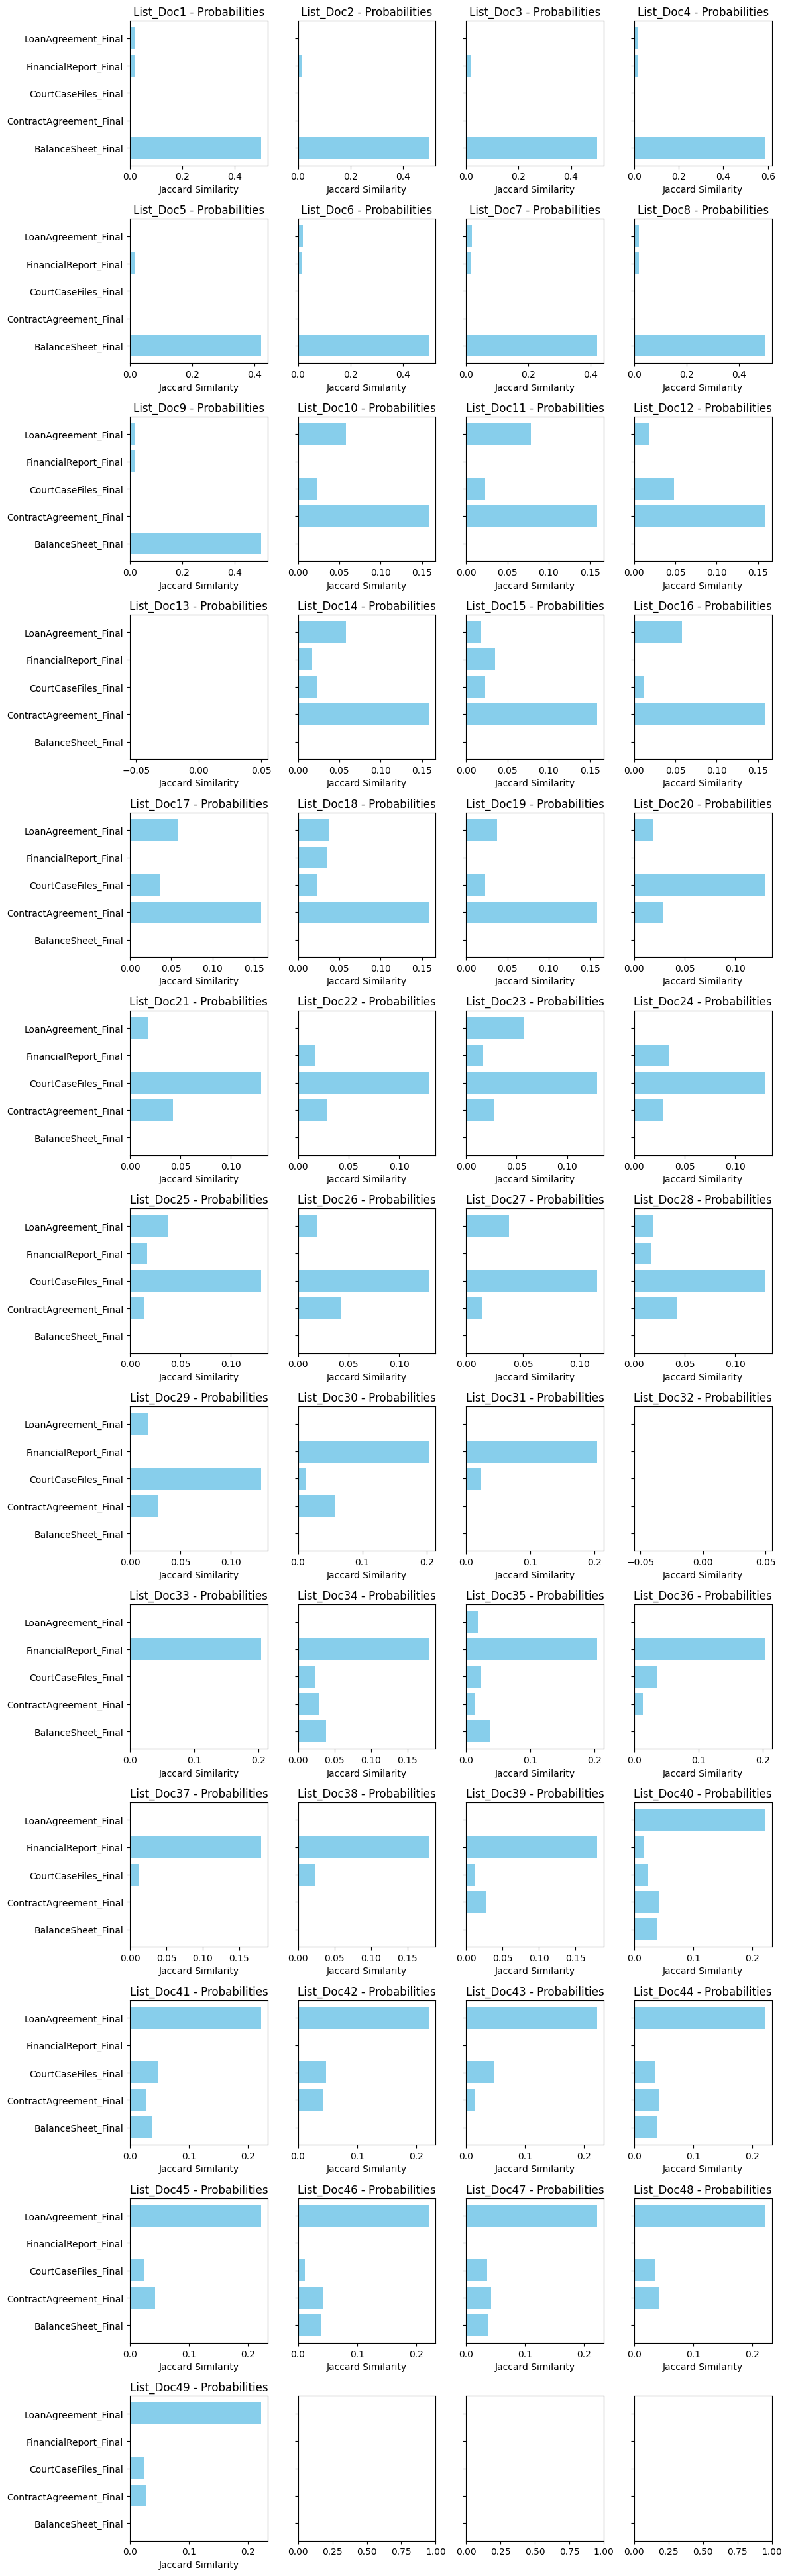

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set up subplots
num_rows = len(doc_corpus) // 4 + 1
num_cols = 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3 * num_rows), sharey=True)

# Iterate through List_Doc lists and calculate similarity with each final list
for i in range(len(doc_corpus)):
    list_name = f"List_Doc{i + 1}"
    list_words = locals()[list_name]

    # Calculate similarity with each final list
    similarities = [calculate_jaccard_similarity(list_words, final_list) for final_list, _ in final_lists]

    # Create horizontal bar chart for visualization
    ax = axes[i // num_cols, i % num_cols]
    ax.barh([name for _, name in final_lists], similarities, color='skyblue')
    ax.set_title(f"{list_name} - Probabilities")
    ax.set_xlabel("Jaccard Similarity")

# Adjust layout
plt.tight_layout()
plt.show()
